### Imblearn 라이브러리는 다른 라이브러리에 영향을 미칠 수 있는 관계로 colab에서 진행 

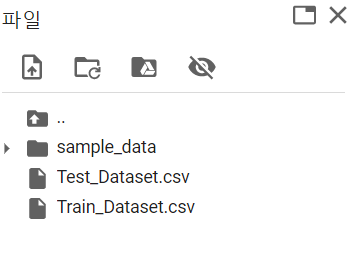

- kaggle에서 data 다운 후 파일에 넣어줘야 코드 돌아갑니다

In [5]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE



# 결측치 대체, Label_encoding등 컬럼에 대한 전처리 클래스
class Preprocessing:
    # 컬럼들 안의 이상 값들
    na_values = ['$', '#VALUE!', '##', 'XNA', '@', '#', 'x', '&']
    # float데이터 인데, object로 되어있는 이상 컬럼들
    columns = ['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Score_Source_3', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days']

    def __init__(self):
        # csv파일 불러오는 과정 na_values안에 포함된 것들은 결측치로 대체
        self.__pay_df = pd.read_csv('./Train_Dataset.csv', na_values=self.na_values, encoding='utf-8', engine='python')

        # columns에 object로 되어있는 컬럼들을 float으로 변경
        for column in self.columns:
            self.__pay_df[column] = pd.to_numeric(self.__pay_df[column], errors='coerce')
        # target data 분리
        self.__y_target = self.__pay_df['Default']
        del self.__pay_df['Default']
        self.__pay_df['Client_Occupation'].fillna('Nojob', inplace=True)
        self.__pay_df['Credit_Bureau'].fillna(self.__pay_df['Credit_Bureau'].mean(), inplace=True)


    def drop_columns(self):
        # 삭제할 column들
        drop_columns = ['Own_House_Age', 'Type_Organization', 'Mobile_Tag', 'Score_Source_1', 'Score_Source_3', 'Social_Circle_Default']
        self.__pay_df.drop(columns=drop_columns, axis=1, inplace=True)

    def category_columns_replace(self):
        # object인 column들(카테고리)만 뽑기
        category_columns_object = self.__pay_df.select_dtypes(include='object').columns

        for column in category_columns_object:
            if self.__pay_df[column].isna().sum() > 10000 or self.__pay_df[column].isna().sum() == 0:
                continue
            unique_columns = self.__pay_df[column].loc[self.__pay_df[column].isna()==False].unique()
            self.__pay_df[column] = self.__pay_df[column].apply(lambda x : random.choice(unique_columns) if pd.isna(x) else x)

        df_null_sum = self.__pay_df.isna().sum()
        column = df_null_sum[df_null_sum>0].index
        self.__pay_df = pd.get_dummies(self.__pay_df, columns=column)


    # numerical_columns에 대해서 결측치를 어떻게 대체할 것인지        
    def numerical_columns_replace(self):
        # numerical_column들
        numerical_columns = ['Client_Income', 'Credit_Amount', 'Loan_Annuity', 
                   'Population_Region_Relative', 'Age_Days', 'Employed_Days',
                   'Registration_Days', 'ID_Days',
                   'Score_Source_2', 'Phone_Change']

        for column in numerical_columns:
            self.__pay_df[column] = self.__pay_df[column].fillna(self.__pay_df[column].mean())


    def train_split(self):
        train_x, test_x, train_y, test_y = train_test_split(test_size=0.2, random_state=42, stratify=self.__y_target)
        smote = SMOTE(random_state=42)

        X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

    # data를 리턴하는 함수
    def get_df(self):
        return self.__pay_df
    
    # target_df를 리턴하는 함수
    def get_target_df(self):
        return self.__y_target

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
preprocessing_db = Preprocessing()

In [38]:
preprocessing_db = Preprocessing()
# 결측치 제거
preprocessing_db.drop_columns()
# 연속형 데이터 대체
preprocessing_db.numerical_columns_replace()
# 범주형 데이터 대체
preprocessing_db.category_columns_replace()

In [39]:
# train_df & target_df 분리
train_df = preprocessing_db.get_df()
target_df = preprocessing_db.get_target_df()

In [40]:
# 식별 변수 (ID) 제거
train_df.drop('ID', axis=1, inplace=True)

In [41]:
# 결측치 확인
pd.set_option('display.max_rows', None)
train_df.isna().sum()

Client_Income                    0
Credit_Amount                    0
Loan_Annuity                     0
Accompany_Client                 0
Client_Income_Type               0
Client_Education                 0
Client_Marital_Status            0
Client_Gender                    0
Loan_Contract_Type               0
Client_Housing_Type              0
Population_Region_Relative       0
Age_Days                         0
Employed_Days                    0
Registration_Days                0
ID_Days                          0
Homephone_Tag                    0
Workphone_Working                0
Client_Occupation                0
Client_Permanent_Match_Tag       0
Client_Contact_Work_Tag          0
Score_Source_2                   0
Phone_Change                     0
Credit_Bureau                    0
Car_Owned_0.0                    0
Car_Owned_1.0                    0
Bike_Owned_0.0                   0
Bike_Owned_1.0                   0
Active_Loan_0.0                  0
Active_Loan_1.0     

In [42]:
train_df.info()
# object 타입 변수 남아있음 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 94 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Client_Income                  121856 non-null  float64
 1   Credit_Amount                  121856 non-null  float64
 2   Loan_Annuity                   121856 non-null  float64
 3   Accompany_Client               121856 non-null  object 
 4   Client_Income_Type             121856 non-null  object 
 5   Client_Education               121856 non-null  object 
 6   Client_Marital_Status          121856 non-null  object 
 7   Client_Gender                  121856 non-null  object 
 8   Loan_Contract_Type             121856 non-null  object 
 9   Client_Housing_Type            121856 non-null  object 
 10  Population_Region_Relative     121856 non-null  float64
 11  Age_Days                       121856 non-null  float64
 12  Employed_Days                 

In [43]:
# objects변수 전처리
cag_colums = train_df.select_dtypes(include='object').columns
train_df = pd.get_dummies(train_df, columns = cag_colums)

In [44]:
# x data 정규화
from sklearn import preprocessing
sc = preprocessing.StandardScaler() # Apply standard scaling on x_data (Standardization)
x_data = sc.fit_transform(train_df)

print(x_data.shape)
print(target_df.shape)

(121856, 140)
(121856,)


In [67]:
# train & test data split 
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(x_data, target_df, 
                                                    test_size=0.3, 
                                                    stratify=target_df,
                                                    random_state=42)

In [68]:
# oversampling (학습 데이터 세트만 오버샘플링)
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)

x_train_over, y_train_over = oversample.fit_resample(train_data, train_label)

In [69]:
print('SMOTE-sampling 적용 전 :', train_df.shape, train_label.shape)
print('SMOTE-sampling 적용 후 :', x_train_over.shape, y_train_over.shape)

SMOTE-sampling 적용 전 : (121856, 140) (85299,)
SMOTE-sampling 적용 후 : (156816, 140) (156816,)


In [70]:
train_label_df = pd.DataFrame(train_label)
y_train_over_df = pd.DataFrame(y_train_over)

In [71]:
print('SMOTE-sampling 적용 전 :')
print(train_label_df.value_counts())
print()

print('SMOTE-sampling 적용 후 :')
print(y_train_over_df.value_counts())

SMOTE-sampling 적용 전 :
Default
0          78408
1           6891
dtype: int64

SMOTE-sampling 적용 후 :
Default
0          78408
1          78408
dtype: int64


In [72]:
# y data one-hot vector
from tensorflow.keras import utils

y_train_over = utils.to_categorical(y_train_over) # 0 or 1 -> one-hot vector
test_label = utils.to_categorical(test_label) 

print(x_train_over.shape)
print(test_data.shape)
print(y_train_over.shape)
print(test_label.shape)

(156816, 140)
(36557, 140)
(156816, 2)
(36557, 2)


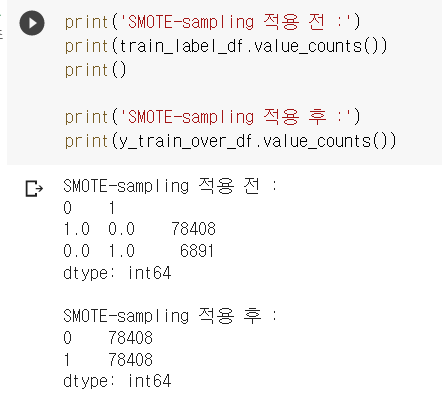

- train & test data split 후 oversampling 전 y_data에 one-hot-vector 적용 했더니 위와 같은 결과 발생 
- 따라서 oversampling 후 y_data에 one-hot-vector 적용